In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("DATA.csv")
# CHECKING  NO OF MISSING VALUES IN EACH COLUMN
data.isnull().sum()

Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64

In [3]:
# DISTRIBUTION  OF Positive cases and negative cases 
print(data['MonkeyPox'].value_counts())
print()

print('Percentage of No Positive cases: {}%'.format(round(data.MonkeyPox.value_counts()['Positive']/len(data) * 100.0,2)))
print('Percentage of Negative cases: {}%'.format(round(data.MonkeyPox.value_counts()['Negative']/len(data) * 100.0,2)))

MonkeyPox
Positive    15909
Negative     9091
Name: count, dtype: int64

Percentage of No Positive cases: 63.64%
Percentage of Negative cases: 36.36%


In [4]:
#Unique values present in every column  
for col in data.columns:
    unique_values=data[col].unique()
    print(f"UNIQUE VALUES IN A COLUMN'{col}':{unique_values}'")
    print()

#Converting the text into numerical of all the columns 
features=["Rectal Pain","Sore Throat","Penile Oedema","Oral Lesions","Solitary Lesion","Swollen Tonsils","HIV Infection","Sexually Transmitted Infection"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})
    
data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})

# None =0  fever =1   Swollen Lymph Nodes=2     Muscle Aches and Pain=3
#data['Systemic Illness']=data['Systemic Illness'].replace({'None':0,'Fever':1,'Swollen Lymph Nodes':2,'Muscle Aches and Pain':3})

data['Patient_ID'] = data['Patient_ID'].str.replace('P','', regex=False).astype(int)
data

UNIQUE VALUES IN A COLUMN'Patient_ID':['P0' 'P1' 'P2' ... 'P24997' 'P24998' 'P24999']'

UNIQUE VALUES IN A COLUMN'Systemic Illness':[nan 'Fever' 'Swollen Lymph Nodes' 'Muscle Aches and Pain']'

UNIQUE VALUES IN A COLUMN'Rectal Pain':[False  True]'

UNIQUE VALUES IN A COLUMN'Sore Throat':[ True False]'

UNIQUE VALUES IN A COLUMN'Penile Oedema':[ True False]'

UNIQUE VALUES IN A COLUMN'Oral Lesions':[ True False]'

UNIQUE VALUES IN A COLUMN'Solitary Lesion':[False  True]'

UNIQUE VALUES IN A COLUMN'Swollen Tonsils':[ True False]'

UNIQUE VALUES IN A COLUMN'HIV Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'Sexually Transmitted Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'MonkeyPox':['Negative' 'Positive']'



C:\Users\pulip\AppData\Local\Temp\ipykernel_15928\747031815.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({True:1,False:0})
C:\Users\pulip\AppData\Local\Temp\ipykernel_15928\747031815.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})


,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,0,NaN,0,1,1,1,0,1,0,0,0
1,1,Fever,1,0,1,1,0,0,1,0,1
2,2,Fever,0,1,1,0,0,0,1,0,1
3,3,NaN,1,0,0,0,1,1,1,0,1
4,4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,NaN,1,1,0,1,1,0,0,1,1
24996,24996,Fever,0,1,1,0,1,1,1,1,1
24997,24997,NaN,1,1,0,0,1,1,0,0,1
24998,24998,Swollen Lymph Nodes,0,1,0,1,1,1,0,0,0


In [5]:
import pandas as pd

# Fill missing values with a specific value
data['Systemic Illness'].fillna('Unknown', inplace=True)

# Perform one-hot encoding
data = pd.get_dummies(data, columns=['Systemic Illness'])

# Print the first few rows of the preprocessed data
print(data.head())

   Patient_ID  Rectal Pain  Sore Throat  Penile Oedema  Oral Lesions  \
0           0            0            1              1             1   
1           1            1            0              1             1   
2           2            0            1              1             0   
3           3            1            0              0             0   
4           4            1            1              1             0   

   Solitary Lesion  Swollen Tonsils  HIV Infection  \
0                0                1              0   
1                0                0              1   
2                0                0              1   
3                1                1              1   
4                0                1              1   

   Sexually Transmitted Infection  MonkeyPox  Systemic Illness_Fever  \
0                               0          0                   False   
1                               0          1                    True   
2                         

C:\Users\pulip\AppData\Local\Temp\ipykernel_15928\1155651068.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Systemic Illness'].fillna('Unknown', inplace=True)


In [6]:
#Converting the text into numerical of all the columns 
features=["Systemic Illness_Fever","Systemic Illness_Muscle Aches and Pain", "Systemic Illness_Swollen Lymph Nodes","Systemic Illness_Unknown"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})

C:\Users\pulip\AppData\Local\Temp\ipykernel_15928\3163387298.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({True:1,False:0})


In [7]:
data

,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Systemic Illness_Unknown
0,0,0,1,1,1,0,1,0,0,0,0,0,0,1
1,1,1,0,1,1,0,0,1,0,1,1,0,0,0
2,2,0,1,1,0,0,0,1,0,1,1,0,0,0
3,3,1,0,0,0,1,1,1,0,1,0,0,0,1
4,4,1,1,1,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,1,1,0,1,1,0,0,1,1,0,0,0,1
24996,24996,0,1,1,0,1,1,1,1,1,1,0,0,0
24997,24997,1,1,0,0,1,1,0,0,1,0,0,0,1
24998,24998,0,1,0,1,1,1,0,0,0,0,0,1,0


In [8]:
print(data.dtypes)

Patient_ID                                int32
Rectal Pain                               int64
Sore Throat                               int64
Penile Oedema                             int64
Oral Lesions                              int64
Solitary Lesion                           int64
Swollen Tonsils                           int64
HIV Infection                             int64
Sexually Transmitted Infection            int64
MonkeyPox                                 int64
Systemic Illness_Fever                    int64
Systemic Illness_Muscle Aches and Pain    int64
Systemic Illness_Swollen Lymph Nodes      int64
Systemic Illness_Unknown                  int64
dtype: object


# Applying Classification Algorithms 

# 1.Logistic Regression

Performance Metrics:
Accuracy: 0.6974
Precision: 0.7247
Recall: 0.8611
F1 Score: 0.7870
ROC/AUC: 0.7076
Specificity: 0.3945
Confusion Matrix:
[[ 692 1062]
 [ 451 2795]]


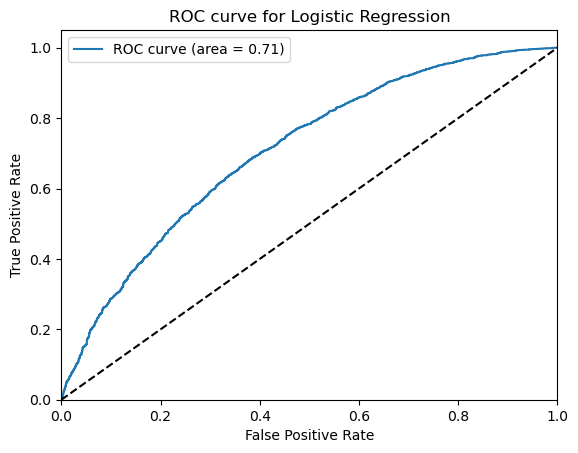

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve,f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1= f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot ROC Curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Receiver Operating Characteristic (ROC) Curve
plt.title('ROC curve for Logistic Regression')
plt.legend()
plt.show()

# Logistic Regression with K-fold

In [26]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Initialize the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
specificity_list = []

# K-Fold Cross-Validation
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Logistic Regression model
    model = LogisticRegression(max_iter=1000, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate specificity
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Append metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    specificity_list.append(specificity)

# Calculate average metrics across all folds
avg_accuracy = sum(accuracy_list) / len(accuracy_list)
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_f1 = sum(f1_list) / len(f1_list)
avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
avg_specificity = sum(specificity_list) / len(specificity_list)

# Print the average results
print("Average Performance Metrics across K-Folds:")
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1 Score: {avg_f1:.4f}")
print(f"ROC/AUC: {avg_roc_auc:.4f}")
print(f"Specificity: {avg_specificity:.4f}")



Average Performance Metrics across K-Folds:
Accuracy: 0.6898
Precision: 0.7104
Recall: 0.8653
F1 Score: 0.7802
ROC/AUC: 0.6998
Specificity: 0.3828


# 2.Random Forest 

Performance Metrics:
Accuracy: 0.6078
Precision: 0.6992
Recall: 0.6947
F1 Score: 0.6970
ROC/AUC: 0.6212
Specificity: 0.4470
Confusion Matrix:
[[ 784  970]
 [ 991 2255]]


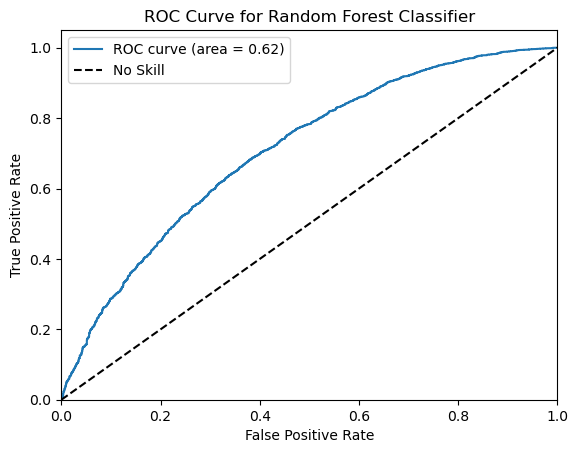

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve,f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred =rf_model.predict(X_test)
y_pred_proba =rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1= f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()



# Random Forest  with k-fold

In [28]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)


# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Initialize the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
specificity_list = []

# K-Fold Cross-Validation
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate specificity
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Append metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    specificity_list.append(specificity)

# Calculate average  metrics across all folds
avg_accuracy = sum(accuracy_list) / len(accuracy_list)
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_f1 = sum(f1_list) / len(f1_list)
avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
avg_specificity = sum(specificity_list) / len(specificity_list)

# Print the average results
print("Average Performance Metrics across K-Folds:")
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1 Score: {avg_f1:.4f}")
print(f"ROC/AUC: {avg_roc_auc:.4f}")
print(f"Specificity: {avg_specificity:.4f}")

Average Performance Metrics across K-Folds:
Accuracy: 0.6101
Precision: 0.6882
Recall: 0.7080
F1 Score: 0.6980
ROC/AUC: 0.6200
Specificity: 0.4388


# 3.Decision Tree

Performance Metrics:
Accuracy: 0.5870
Precision: 0.6884
Recall: 0.6648
F1 Score: 0.6764
ROC/AUC: 0.5539
Specificity: 0.4430
Confusion Matrix:
[[ 777  977]
 [1088 2158]]


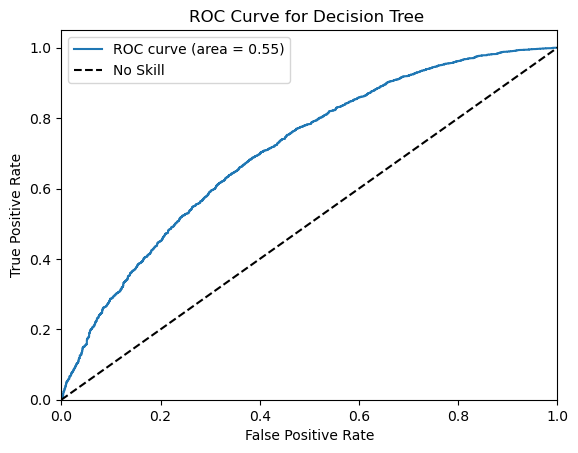

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


# Make predictions
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1= f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree ')
plt.legend()
plt.show()


# Decision Tree with k-fold

In [30]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Initialize the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
specificity_list = []

# K-Fold Cross-Validation
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Decision Tree model
    model = DecisionTreeClassifier(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate specificity
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Append metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    specificity_list.append(specificity)

# Calculate average metrics across all folds
avg_accuracy = sum(accuracy_list) / len(accuracy_list)
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_f1 = sum(f1_list) / len(f1_list)
avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
avg_specificity = sum(specificity_list) / len(specificity_list)

# Print the average results
print("Average Performance Metrics across K-Folds:")
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1 Score: {avg_f1:.4f}")
print(f"ROC/AUC: {avg_roc_auc:.4f}")
print(f"Specificity: {avg_specificity:.4f}")

Average Performance Metrics across K-Folds:
Accuracy: 0.5952
Precision: 0.6824
Recall: 0.6806
F1 Score: 0.6815
ROC/AUC: 0.5631
Specificity: 0.4457


# Navive Bayes

Performance Metrics:
Accuracy: 0.6894
Precision: 0.7412
Recall: 0.8013
F1 Score: 0.7701
ROC/AUC: 0.7026
Specificity: 0.4823
Confusion Matrix:
[[ 846  908]
 [ 645 2601]]


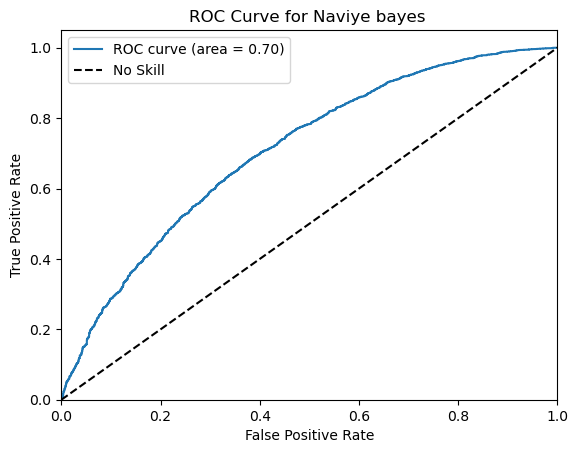

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve,f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_model = GaussianNB()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred =rf_model.predict(X_test)
y_pred_proba =rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1= f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naviye bayes ')
plt.legend()
plt.show()

# Naive Bayes with K-Fold Cross-Validation

In [37]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Initialize the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
specificity_list = []

# K-Fold Cross-Validation
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Gaussian Naive Bayes model
    model = GaussianNB()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate specificity
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Append metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    specificity_list.append(specificity)

# Calculate average metrics across all folds
avg_accuracy = sum(accuracy_list) / len(accuracy_list)
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_f1 = sum(f1_list) / len(f1_list)
avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
avg_specificity = sum(specificity_list) / len(specificity_list)

# Print the average results
print("Average Performance Metrics across K-Folds:")
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1 Score: {avg_f1:.4f}")
print(f"ROC/AUC: {avg_roc_auc:.4f}")
print(f"Specificity: {avg_specificity:.4f}")

Average Performance Metrics across K-Folds:
Accuracy: 0.6783
Precision: 0.7251
Recall: 0.7964
F1 Score: 0.7591
ROC/AUC: 0.6927
Specificity: 0.4717


# Support Vector Machine 

Performance Metrics:
Accuracy: 0.6492
Precision: 0.6492
Recall: 1.0000
F1 Score: 0.7873
ROC/AUC: 0.4891
Specificity: 0.0000
Confusion Matrix:
[[   0 1754]
 [   0 3246]]


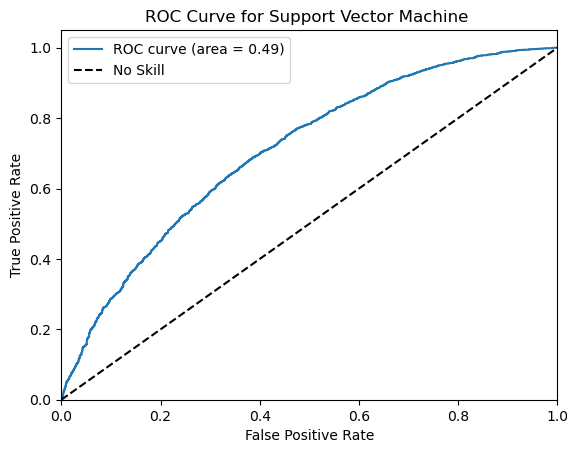

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve,f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm_model = SVC(probability=True, random_state=42)  # Set probability=True for ROC/AUC calculation
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1= f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine ')
plt.legend()
plt.show()


# SVM with K-Fold Cross-Validation

# KNN

Performance Metrics:
Accuracy: 0.5688
Precision: 0.6471
Recall: 0.7388
F1 Score: 0.6899
ROC/AUC: 0.4990
Specificity: 0.2543
Confusion Matrix:
[[ 446 1308]
 [ 848 2398]]


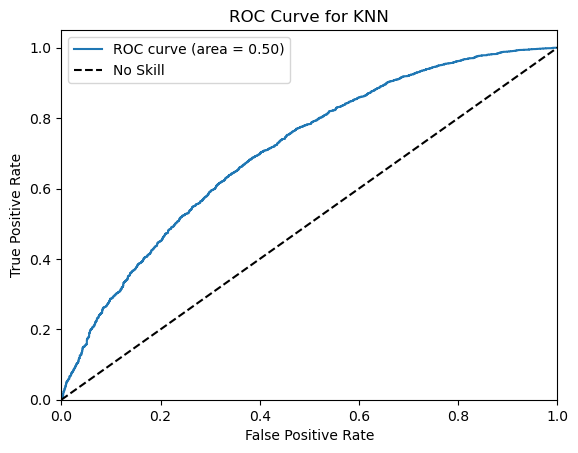

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve, f1_score)


# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()

# Gradient Boosting 

Performance Metrics:
Accuracy: 0.7020
Precision: 0.7209
Recall: 0.8826
F1 Score: 0.7936
ROC/AUC: 0.7028
Specificity: 0.3677
Confusion Matrix:
[[ 645 1109]
 [ 381 2865]]


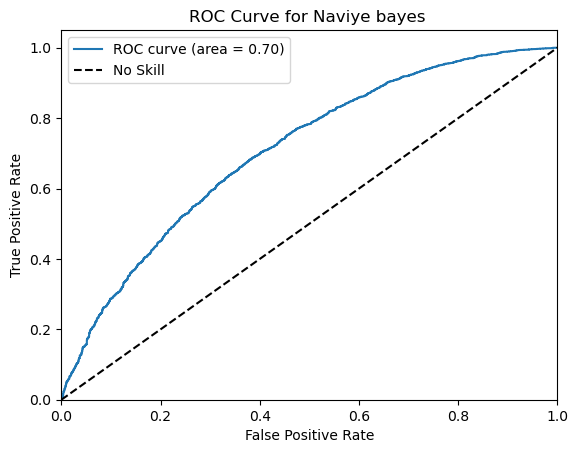

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)


# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naviye bayes ')
plt.legend()
plt.show()

# Gradient Boosting with K-Fold

In [41]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Initialize the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
specificity_list = []

# K-Fold Cross-Validation
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Gradient Boosting model
    model = GradientBoostingClassifier(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate specificity
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Append metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    specificity_list.append(specificity)

# Calculate average metrics across all folds
avg_accuracy = sum(accuracy_list) / len(accuracy_list)
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_f1 = sum(f1_list) / len(f1_list)
avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
avg_specificity = sum(specificity_list) / len(specificity_list)

# Print the average results
print("Average Performance Metrics across K-Folds:")
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1 Score: {avg_f1:.4f}")
print(f"ROC/AUC: {avg_roc_auc:.4f}")
print(f"Specificity: {avg_specificity:.4f}")

Average Performance Metrics across K-Folds:
Accuracy: 0.6907
Precision: 0.7056
Recall: 0.8820
F1 Score: 0.7840
ROC/AUC: 0.6965
Specificity: 0.3558


# Ada Boost

C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performance Metrics:
Accuracy: 0.6980
Precision: 0.7248
Recall: 0.8623
F1 Score: 0.7876
ROC/AUC: 0.7059
Specificity: 0.3940
Confusion Matrix:
[[ 691 1063]
 [ 447 2799]]


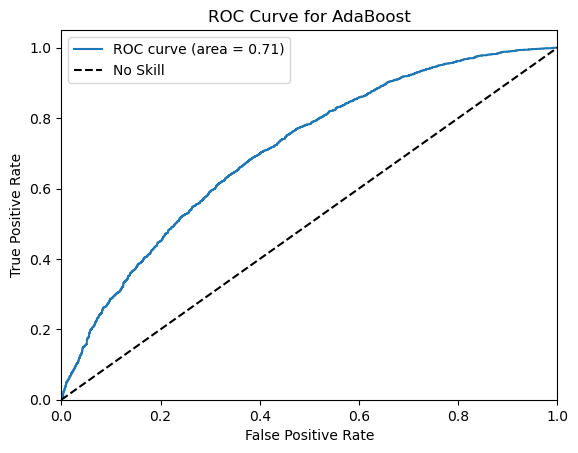

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)


# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust n_estimators
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)
y_pred_proba = ada_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend()
plt.show()

# Ada Boost with k-fold

In [43]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Initialize the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

# K-Fold Cross-Validation
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train the AdaBoost classifier
    ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
    ada_model.fit(X_train, y_train)

    # Make predictions
    y_pred = ada_model.predict(X_test)
    y_pred_proba = ada_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Calculate specificity
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)


    # Append metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    specificity_list.append(specificity)

# Calculate average metrics across all folds
avg_accuracy = sum(accuracy_list) / len(accuracy_list)
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_f1 = sum(f1_list) / len(f1_list)
avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)

# Print the average results
print("Average Performance Metrics across K-Folds:")
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1 Score: {avg_f1:.4f}")
print(f"ROC/AUC: {avg_roc_auc:.4f}")
print(f"Specificity: {avg_specificity:.4f}")

C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

Average Performance Metrics across K-Folds:
Accuracy: 0.6902
Precision: 0.7105
Recall: 0.8662
F1 Score: 0.7807
ROC/AUC: 0.6984
Specificity: 0.3558


In [45]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Initialize the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
specificity_list = []

# K-Fold Cross-Validation
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create an AdaBoost model using a Decision Tree as the base estimator
    base_estimator = DecisionTreeClassifier(max_depth=1)  # Decision stump
    model = AdaBoostClassifier( n_estimators=50, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate specificity
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Append metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    specificity_list.append(specificity)

# Calculate average metrics across all folds
avg_accuracy = sum(accuracy_list) / len(accuracy_list)
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_f1 = sum(f1_list) / len(f1_list)
avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
avg_specificity = sum(specificity_list) / len(specificity_list)

# Print the average results
print("Average Performance Metrics across K-Folds:")
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1 Score: {avg_f1:.4f}")
print(f"ROC/AUC: {avg_roc_auc:.4f}")
print(f"Specificity: {avg_specificity:.4f}")

C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

Average Performance Metrics across K-Folds:
Accuracy: 0.6902
Precision: 0.7105
Recall: 0.8662
F1 Score: 0.7807
ROC/AUC: 0.6984
Specificity: 0.3822


# XGBoost

C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\xgboost\core.py:158: UserWarning: [07:05:04] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance Metrics:
Accuracy: 0.6856
Precision: 0.7182
Recall: 0.8487
F1 Score: 0.7780
ROC/AUC: 0.6616
Specificity: 0.3837
Confusion Matrix:
[[ 673 1081]
 [ 491 2755]]


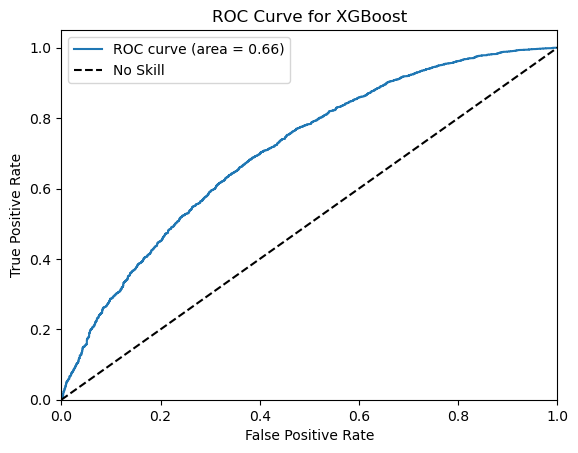

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)


# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("XGBoost Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()

# XG Boost with k-fold

In [52]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)


# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Initialize the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
specificity_list = []

# K-Fold Cross-Validation
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create an XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate specificity
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Append metrics to the lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)
    specificity_list.append(specificity)

# Calculate average metrics across all folds
avg_accuracy = sum(accuracy_list) / len(accuracy_list)
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_f1 = sum(f1_list) / len(f1_list)
avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)
avg_specificity = sum(specificity_list) / len(specificity_list)

# Print the average results
print("Average Performance Metrics across K-Folds:")
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1 Score: {avg_f1:.4f}")
print(f"ROC/AUC: {avg_roc_auc:.4f}")
print(f"Specificity: {avg_specificity:.4f}")

C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\xgboost\core.py:158: UserWarning: [07:05:19] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\xgboost\core.py:158: UserWarning: [07:05:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\xgboost\core.py:158: UserWarning: [07:05:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\xgboost\core.py:158: UserWarning: [07:05:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Pa

Average Performance Metrics across K-Folds:
Accuracy: 0.6726
Precision: 0.7018
Recall: 0.8442
F1 Score: 0.7664
ROC/AUC: 0.6638
Specificity: 0.3722


C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\xgboost\core.py:158: UserWarning: [07:05:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# LightBGM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
LightGBM Performance Metrics:
Accuracy: 0.7030
Precision: 0.7193
Recall: 0.8897
F1 Score: 0.7955
ROC/AUC: 0.6907
Specificity: 0.3575
Confusion Matrix:
[[ 627 1127]
 [ 358 2888]]


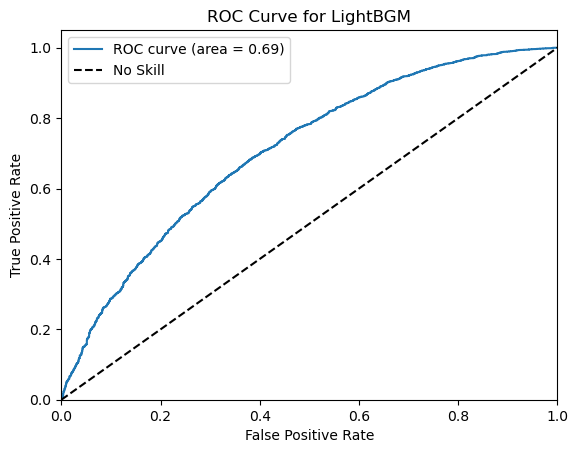

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)


# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the LightGBM classifier
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("LightGBM Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightBGM')
plt.legend()
plt.show()

C:\Users\pulip\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:59:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754


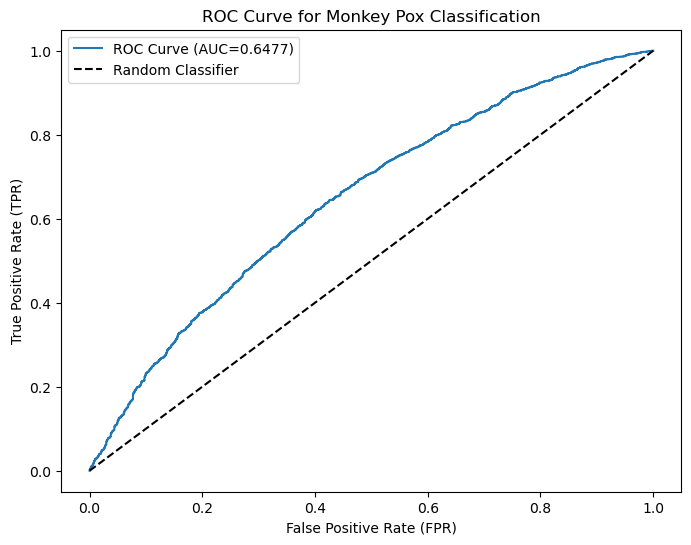

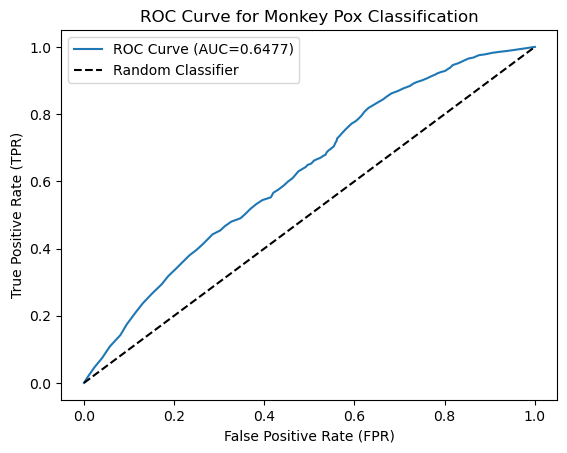

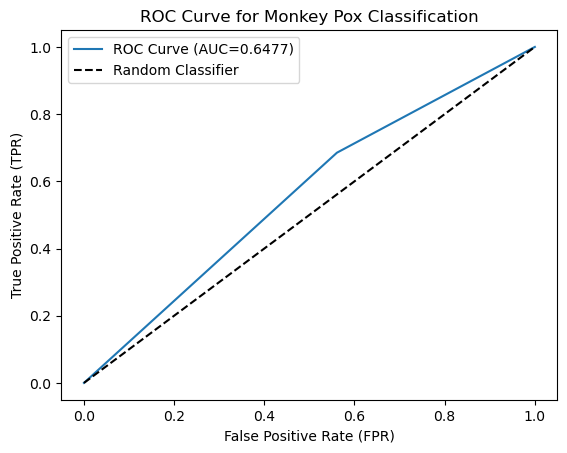

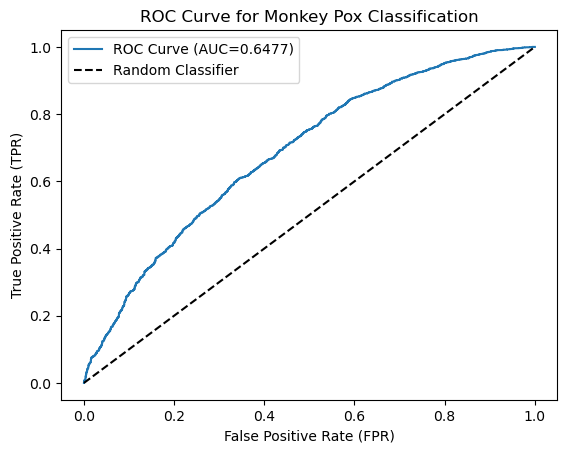

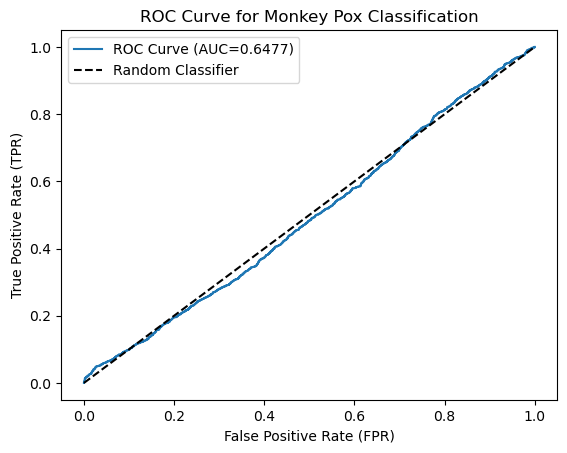

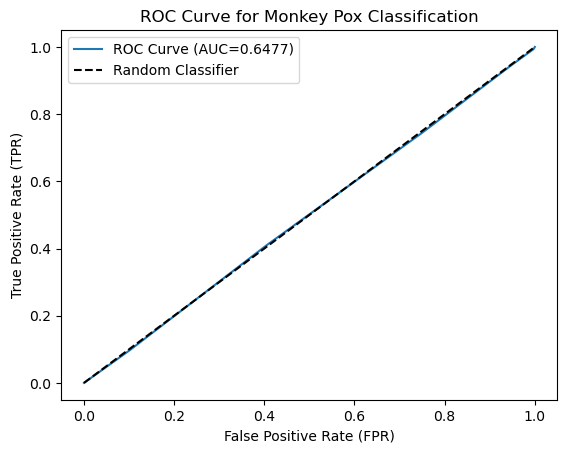

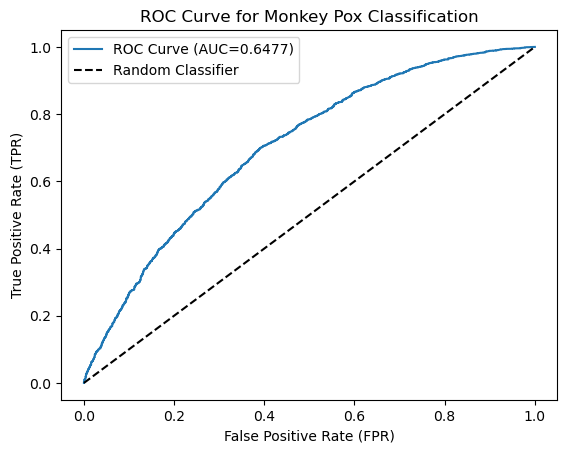

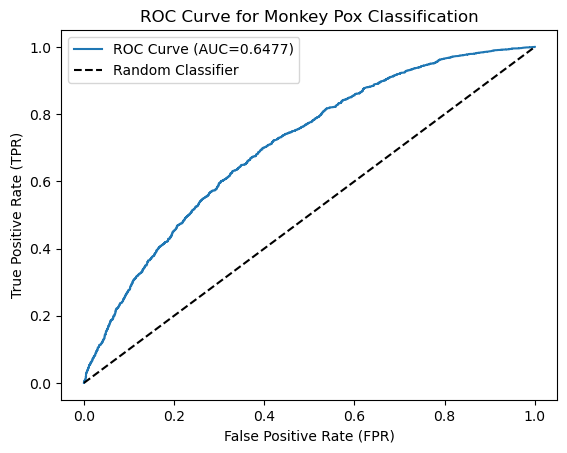

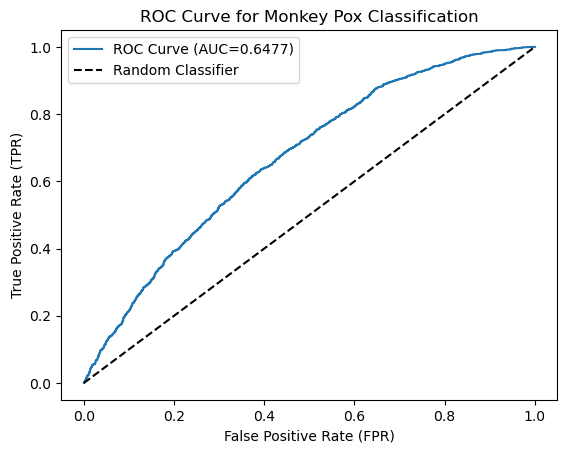

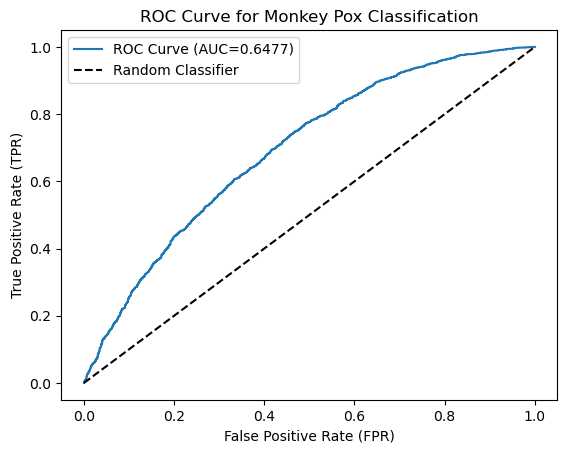

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC                                                                                                                             
from sklearn.neighbors import KNeighborsClassifier                                                                                    
from sklearn.ensemble import GradientBoostingClassifier                                                                                        
from sklearn.ensemble import AdaBoostClassifier                                                                                       
from sklearn.tree import DecisionTreeClassifier  
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier                                                                                                                                
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = [LogisticRegression(max_iter=1000, random_state=42),  # Add comma here
          RandomForestClassifier(n_estimators=100, random_state=42),
          DecisionTreeClassifier(random_state=42),
          GaussianNB(),
          SVC(probability=True, random_state=42),
          KNeighborsClassifier(n_neighbors=5),
          GradientBoostingClassifier(random_state=42),
          AdaBoostClassifier(n_estimators=50, random_state=42),
          XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
          LGBMClassifier(random_state=42)]

y_pred_proba_list = []
for model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred_proba_list.append(y_pred_proba)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for model, y_pred_proba in zip(models, y_pred_proba_list):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label='ROC Curve (AUC={:.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Dashed line for random
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve for Monkey Pox Classification')
    plt.legend()
    plt.show()

C:\Users\pulip\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:04:24] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754


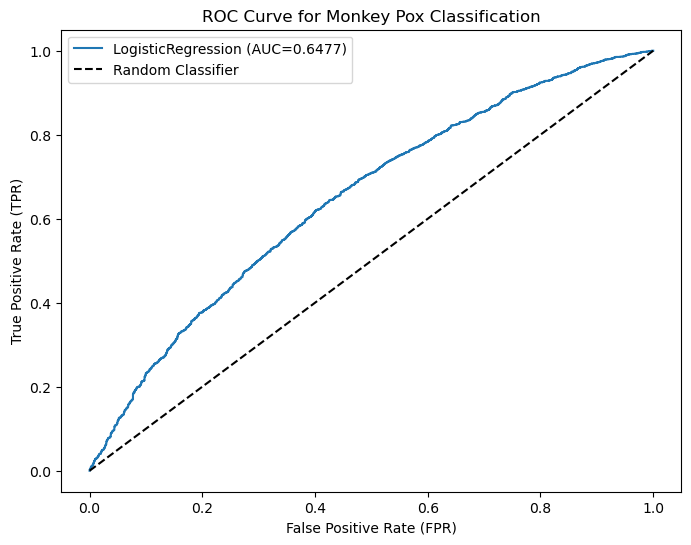

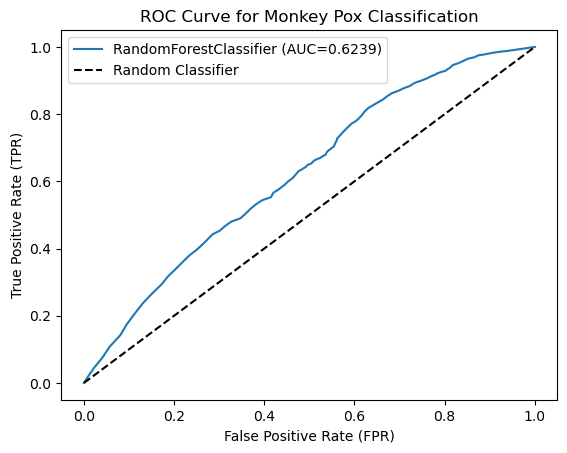

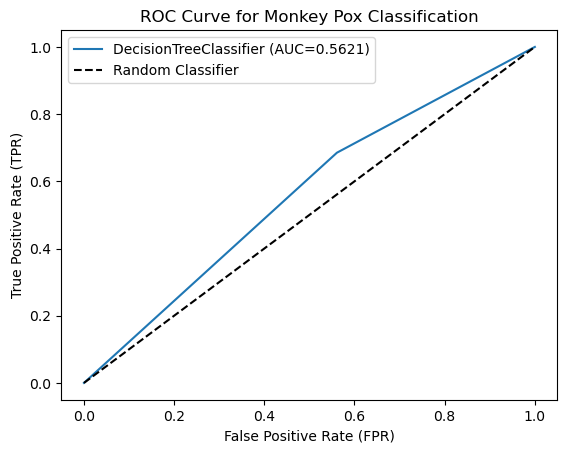

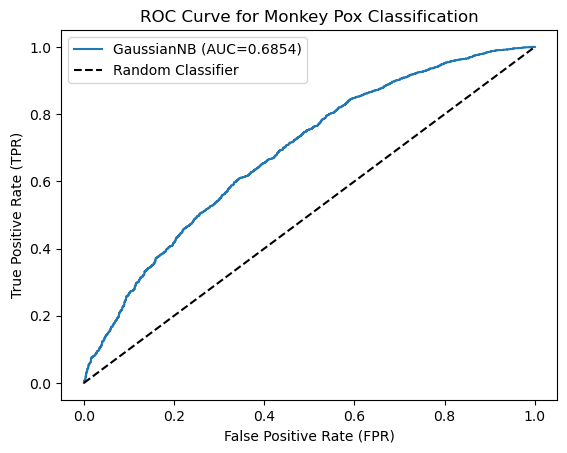

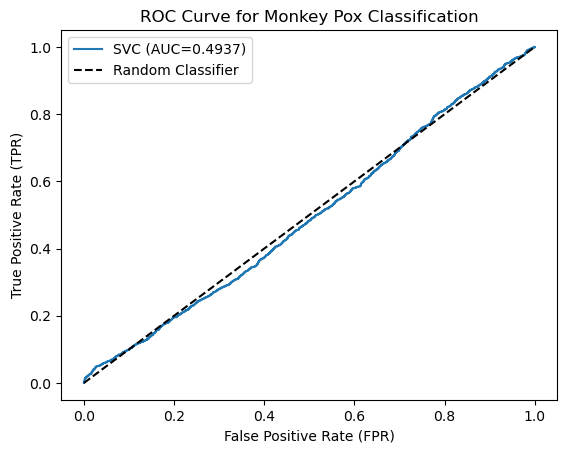

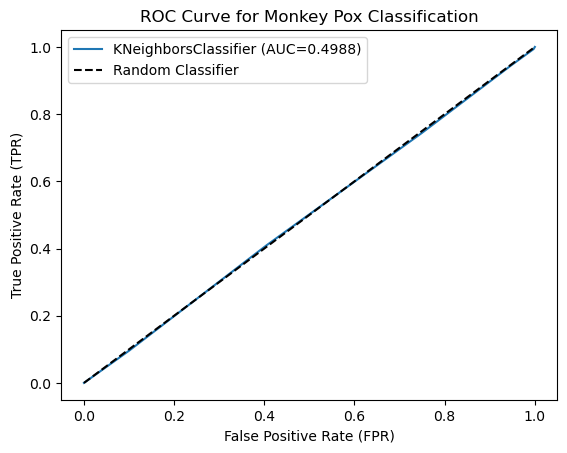

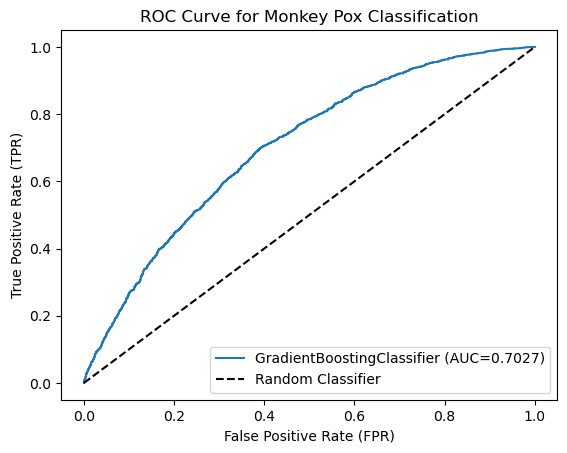

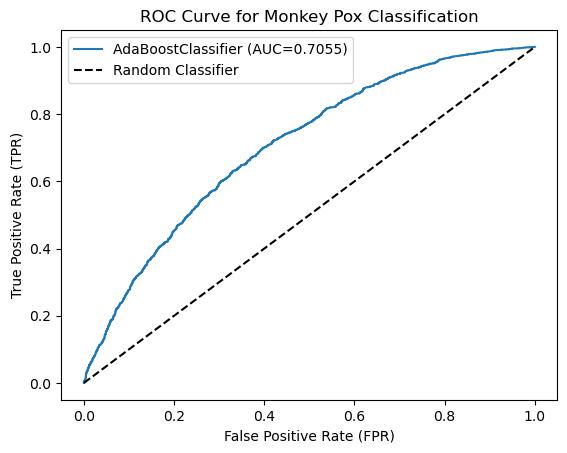

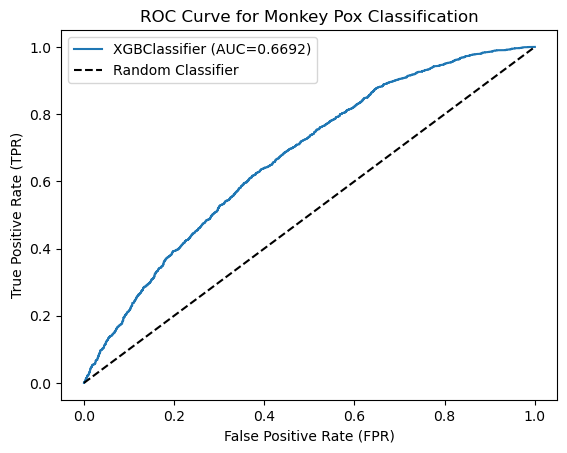

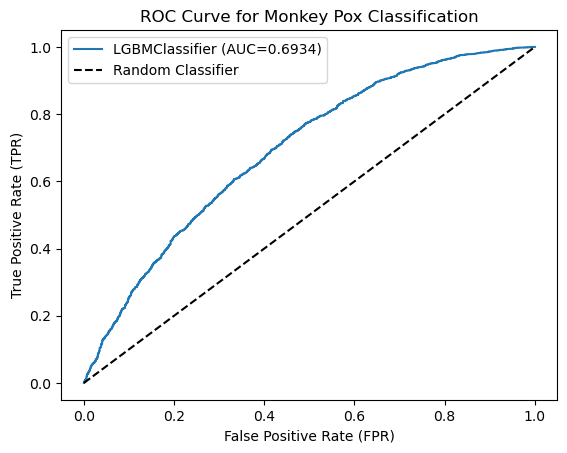

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = [LogisticRegression(max_iter=1000, random_state=42),
          RandomForestClassifier(n_estimators=100, random_state=42),
          DecisionTreeClassifier(random_state=42),
          GaussianNB(),
          SVC(probability=True, random_state=42),
          KNeighborsClassifier(n_neighbors=5),
          GradientBoostingClassifier(random_state=42),
          AdaBoostClassifier(n_estimators=50, random_state=42),
          XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
          LGBMClassifier(random_state=42)]

y_pred_proba_list = []
for model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred_proba_list.append(y_pred_proba)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for model, y_pred_proba in zip(models, y_pred_proba_list):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC={roc_auc:.4f})')  # Add label with model name
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Dashed line for random
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve for Monkey Pox Classification')
    plt.legend()
    plt.show()

C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\xgboost\core.py:158: UserWarning: [07:12:13] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12727, number of negative: 7273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.636350 -> initscore=0.559557
[LightGBM] [Info] Start training from score 0.559557


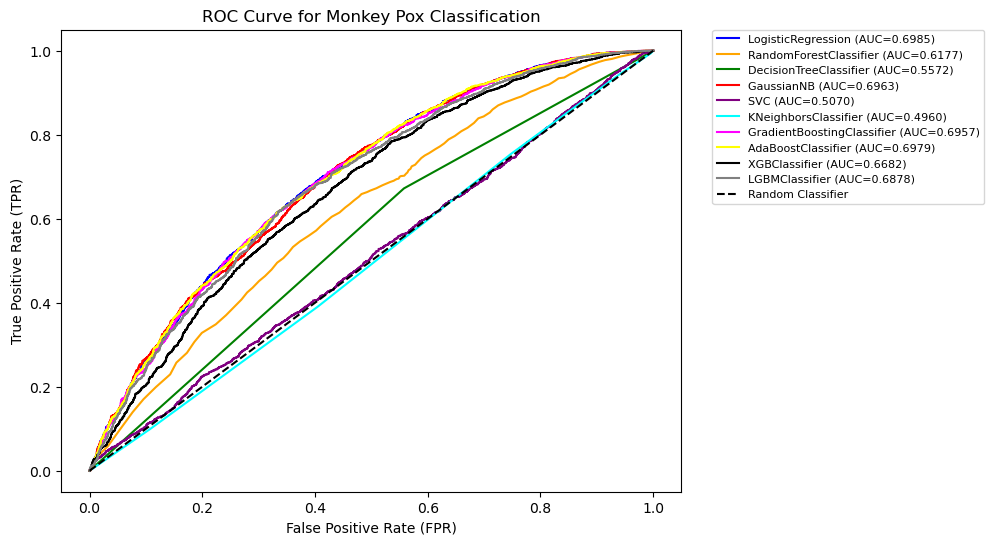

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = [LogisticRegression(max_iter=1000, random_state=42),
          RandomForestClassifier(n_estimators=100, random_state=42),
          DecisionTreeClassifier(random_state=42),
          GaussianNB(),
          SVC(probability=True, random_state=42),
          KNeighborsClassifier(n_neighbors=5),
          GradientBoostingClassifier(random_state=42),
          AdaBoostClassifier(n_estimators=50, random_state=42),
          XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
          LGBMClassifier(random_state=42)]

y_pred_proba_list = []
for model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred_proba_list.append(y_pred_proba)

# Plot ROC curves with different colors
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'grey']
for model, y_pred_proba, color in zip(models, y_pred_proba_list, colors):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'{type(model).__name__} (AUC={roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Dashed line for random
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Monkey Pox Classification')
# Adjust legend position and size
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8,borderaxespad=0.0)  
plt.show()

# Feature selection Algorithms

Now  we will consider classification algorithms as Baseline accuraarcy ,
and apply feature selection algorithms by using classification algorithms

I have applied the classification algorithms on all the features of the dataset, Now let's try to increase the model performance by applying Feature selections algorithms